In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("max_rows", 5)

## Prise des données

In [28]:
nenterree=8
nsurface=20
nsurface2=int(nsurface/2)
distsurf=1.5

## Electrodes

In [29]:
xs = np.arange(0, nsurface*distsurf, distsurf) #surface
ys = np.zeros_like(xs)
zs = np.zeros_like(xs)
dfs = pd.DataFrame.from_dict({'X' : xs , 'Y' : ys , 'Z' :zs})
dfs.index+=1

In [30]:
list_index= np.arange(101,101+nenterree,1)
xe = []
xse=[7,9,11,13]
for i in range (len(xse)) :
    xe.append(distsurf*(xse[i]-1)+distsurf/2)
xe.extend((-10,-13,-16,-19))
xe

[9.75, 12.75, 15.75, 18.75, -10, -13, -16, -19]

In [31]:
ze = [-10,-10,-10,-10,-10,-10,-10,-10]
ye = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze, '#' :list_index})
dfe.set_index('#', inplace=True)
dfe

,X,Y,Z
#,,,
101,9.75,0.0,-10
102,12.75,0.0,-10
...,...,...,...
107,-16.00,0.0,-10
108,-19.00,0.0,-10


In [32]:
dfse=dfs.append(dfe,ignore_index=False)
dfse

,X,Y,Z
1,0.0,0.0,0.0
2,1.5,0.0,0.0
...,...,...,...
107,-16.0,0.0,-10.0
108,-19.0,0.0,-10.0


In [33]:
dfse1 = dfse.drop('Y', 'columns')

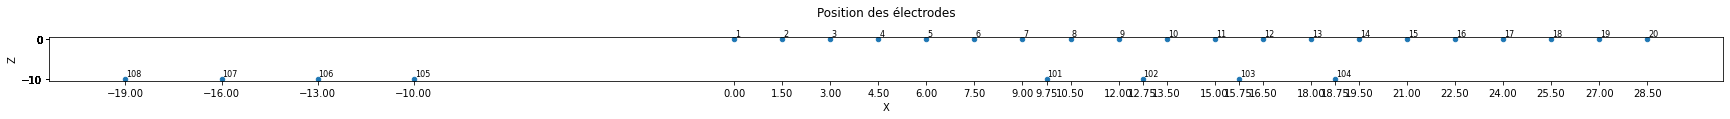

In [34]:
fig, ax = plt.subplots()
dfse.plot.scatter(x='X', y='Z', title='Position des électrodes\n', grid=False, yticks=dfse['Z'], xticks=dfse['X'], figsize=(30,0.8), ax=ax)
                 # xlim=(dfs.at[1, 'X'], dfs.at[len(dfs), 'X']))
for k, v in dfse1.iterrows():
   ax.annotate(k, v, xytext=(1,3), textcoords='offset points', fontsize=8)
plt.show() 

## Seq

### 1 électrode 101

In [9]:
surface_ouest=7
enterree=101
seq=[]
for i in range(0, nsurface2) :
    for j in range(0,2) :
        A = surface_ouest-1-i+j
        B = surface_ouest+1+i+j
        M = surface_ouest+j
        N = enterree
        if B>nsurface or A<1 :
            pass
        else :
            seq.append([A,B,M,N])
            
seq.append([107,106,105,101])
seq.append([107,101,106,105])

aa1=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
aa1.index+=1
aa1

,A,B,M,N
1,6,8,7,101
2,7,9,8,101
...,...,...,...,...
14,107,106,105,101
15,107,101,106,105


In [10]:
ze = [0,-10,-10,-10,-10,-10,-10,-10]
ye = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze, '#' :list_index})
dfe.set_index('#', inplace=True)
dfse=dfs.append(dfe,ignore_index=False)
dfse

,X,Y,Z
1,0.0,0.0,0.0
2,1.5,0.0,0.0
...,...,...,...
107,-16.0,0.0,-10.0
108,-19.0,0.0,-10.0


In [11]:
with open('aa101.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('aa101.txt', sep='\t', mode='a', index=True)

with open('aa101.txt', mode='a') as file : 
    file.write('#')
    
aa1.to_csv('aa101.txt', sep='\t', mode='a', index=True)

### 2 électrodes 102

In [12]:
surface_ouest=9
enterree=102
seq=[]
for i in range(0, nsurface2) :
    for j in range(0,2) :
        A = surface_ouest-1-i+j
        B = surface_ouest+1+i+j
        M = surface_ouest+j
        N = enterree
        if B>nsurface or A<1:
            pass
        else :
            seq.append([A,B,M,N])
            
            
for i in range(0, min(surface_ouest-1,nsurface-surface_ouest+1)) :
    A = surface_ouest-i-1
    B = surface_ouest+i
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

for i in range(0, surface_ouest-1) :
    A = surface_ouest-i-1
    B = surface_ouest
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

for i in range(0, nsurface-surface_ouest+1) :
    A = surface_ouest-1
    B = surface_ouest+i
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

seq.append([106,105,101,102])
seq.append([106,102,105,101])
            
aa2=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
aa2.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
aa2.index+=1
aa2

,A,B,M,N
1,8,10,9,102
2,9,11,10,102
...,...,...,...,...
44,106,105,101,102
45,106,102,105,101


In [13]:
ze = [-10,0,-10,-10,-10,-10,-10,-10]
ye = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze, '#' :list_index})
dfe.set_index('#', inplace=True)
dfse=dfs.append(dfe,ignore_index=False)
dfse

,X,Y,Z
1,0.0,0.0,0.0
2,1.5,0.0,0.0
...,...,...,...
107,-16.0,0.0,-10.0
108,-19.0,0.0,-10.0


In [14]:
with open('aa102.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('aa102.txt', sep='\t', mode='a', index=True)

with open('aa102.txt', mode='a') as file : 
    file.write('#')
    
aa2.to_csv('aa102.txt', sep='\t', mode='a', index=True)

### 3 électrodes 103

In [15]:
surface_ouest=11
enterree=103
seq=[]
for i in range(0, nsurface2) :
    for j in range(0,2) :
        A = surface_ouest-1-3*i+j
        B = surface_ouest+1+3*i+j
        M = surface_ouest+j
        N = enterree
        if B>nsurface or A<1:
            pass
        else :
            seq.append([A,B,M,N])
            
            
for i in range(0, min(surface_ouest-1,nsurface-surface_ouest+1)) :
    A = surface_ouest-i-1
    B = surface_ouest+i
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

for i in range(0, surface_ouest-1) :
    A = surface_ouest-2*i-1
    B = surface_ouest
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

for i in range(0, nsurface-surface_ouest+1) :
    A = surface_ouest-1
    B = surface_ouest+2*i
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

        
for i in range(1, nsurface+1) :
        A = enterree-2
        B = enterree 
        M = enterree-1
        N = i
        if N>nsurface or N<1 :
            pass
        else :
            seq.append([A,B,M,N])

seq.append([105,101,102,103])
seq.append([105,103,101,102])
seq.append([107,106,102,103])
            
aa3=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
aa3.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
aa3.index+=1
aa3

,A,B,M,N
1,10,12,11,103
2,11,13,12,103
...,...,...,...,...
46,105,103,101,102
47,107,106,102,103


In [16]:
ze = [-10,-10,0,-10,-10,-10,-10,-10]
ye = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze, '#' :list_index})
dfe.set_index('#', inplace=True)
dfse=dfs.append(dfe,ignore_index=False)
dfse

,X,Y,Z
1,0.0,0.0,0.0
2,1.5,0.0,0.0
...,...,...,...
107,-16.0,0.0,-10.0
108,-19.0,0.0,-10.0


In [17]:
with open('aa103.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('aa103.txt', sep='\t', mode='a', index=True)

with open('aa103.txt', mode='a') as file : 
    file.write('#')
    
aa3.to_csv('aa103.txt', sep='\t', mode='a', index=True)

### 4 électrodes 104

In [18]:
surface_ouest=13
enterree=104
seq=[]
for i in range(0, nsurface2) :
    for j in range(0,2) :
        A = surface_ouest-1-3*i+j
        B = surface_ouest+1+3*i+j
        M = surface_ouest+j
        N = enterree
        if B>nsurface or A<1:
            pass
        else :
            seq.append([A,B,M,N])
            
            
for i in range(0, min(surface_ouest-1,nsurface-surface_ouest+1)) :
    A = surface_ouest-i-1
    B = surface_ouest+i
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

for i in range(0, surface_ouest-1) :
    A = surface_ouest-2*i-1
    B = surface_ouest
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

for i in range(0, nsurface-surface_ouest+1) :
    A = surface_ouest-1
    B = surface_ouest+2*i
    M = enterree-1
    N = enterree
    if B>nsurface or A<1 :
        pass
    else :
        seq.append([A,B,M,N])

        
for i in range(1, nsurface+1) :
        A = enterree-2
        B = enterree 
        M = enterree-1
        N = i
        if N>nsurface or N<1 :
                pass
        else :
            seq.append([A,B,M,N])
            

seq.append([101,102,103,104])
seq.append([101,104,102,103])
seq.append([108,107,103,104])
seq.append([108,105,101,104])
        
aa4=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
aa4.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
aa4.index+=1
aa4

,A,B,M,N
1,12,14,13,104
2,13,15,14,104
...,...,...,...,...
44,108,107,103,104
45,108,105,101,104


In [19]:
ze = [-10,-10,-10,0,-10,-10,-10,-10]
ye = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze, '#' :list_index})
dfe.set_index('#', inplace=True)
dfse=dfs.append(dfe,ignore_index=False)
dfse

,X,Y,Z
1,0.0,0.0,0.0
2,1.5,0.0,0.0
...,...,...,...
107,-16.0,0.0,-10.0
108,-19.0,0.0,-10.0


In [20]:
with open('aa104.txt', mode='w+') as file : 
    file.write('#')
dfse.to_csv('aa104.txt', sep='\t', mode='a', index=True)

with open('aa104.txt', mode='a') as file : 
    file.write('#')
    
aa4.to_csv('aa104.txt', sep='\t', mode='a', index=True)